Start time is 2024-10-27 at 00:00:00
End time is 2024-11-01 at 00:00:00

Energy production values of PJM

In [1]:
#First, we must import packages as usual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

from sklearn import tree
import xgboost as xgb

Data collection and clean up

In [2]:
x=pd.read_csv('historical_weather_data.csv')
x_time=x[['time']]
x=x.drop(columns=["time",'location','snow','wpgt','tsun'])
# print(x.head())

# Read the CSV file into a DataFrame
df = pd.read_csv('renewable_energy_Data.csv')
y=df[['value']]
# print(y.head())
# Filter the DataFrame to extract only the required fuel types: 'SUN', 'WND', 'WA


Test train split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3)#, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [4753, 5000]

Linear Regression

R² (Linear Regression): 0.38982435786927805


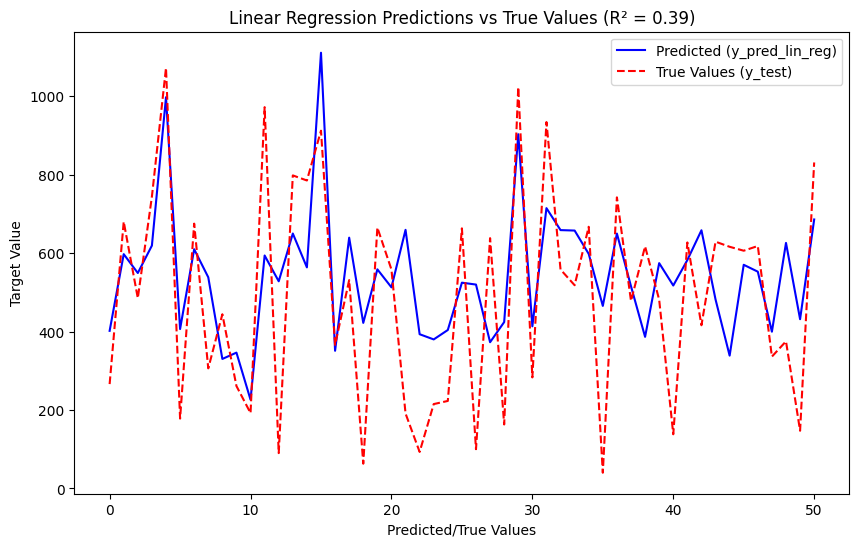

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lin_reg = lin_reg.predict(x_test)

# Calculate R² score
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"R² (Linear Regression): {r2_lin_reg}")
# Generate a linspace for plotting
x_vals_lin_reg = np.linspace(0, len(y_test)-1, len(y_test))

# Plot y_pred_lin_reg vs linspace and y_test vs linspace
plt.figure(figsize=(10, 6))
plt.plot(x_vals_lin_reg, y_pred_lin_reg, label='Predicted (y_pred_lin_reg)', color='b')
plt.plot(x_vals_lin_reg, y_test, label='True Values (y_test)', color='r', linestyle='--')
plt.xlabel('Predicted/True Values')
plt.ylabel('Target Value')
plt.title(f'Linear Regression Predictions vs True Values (R² = {r2_lin_reg:.2f})')
plt.legend()
plt.show()


OLS

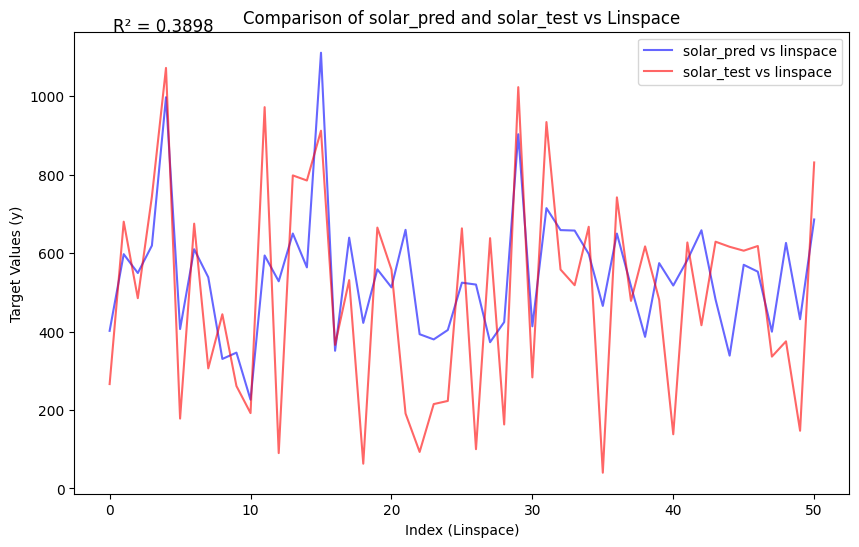

In [ ]:
#  Add a constant to the model (intercept term)
x_train_with_intercept = sm.add_constant(x_train)
x_test_with_intercept = sm.add_constant(x_test)
# Fit the OLS model
ols_model = sm.OLS(y_train, x_train_with_intercept).fit()

y_pred = ols_model.predict(x_test_with_intercept)


# Evaluate the model using Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
r2=r2_score(y_test,y_pred)

# Assuming x_test is a DataFrame and contains the 'windspeed' column
# Extract the 'windspeed' column from x_test
import numpy as np
import matplotlib.pyplot as plt

# Create a linspace with the same length as y_test and y_pred
x_linspace = np.linspace(0, len(y_test)-1, len(y_pred))

# Plotting
plt.figure(figsize=(10, 6))

# Plot y_pred vs linspace
plt.plot(x_linspace, y_pred, color='blue', label='solar_pred vs linspace', alpha=0.6)

# Plot solar_test vs linspace
plt.plot(x_linspace, y_test, color='red', label='solar_test vs linspace', alpha=0.6)

# Add labels and title
plt.text(0.05, 1, f'R² = {r2:.4f}', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.xlabel('Index (Linspace)')
plt.ylabel('Target Values (y)')
plt.title('OLS: Predicted vs Actual')

# Show legend
plt.legend()

# Show plot
plt.show()

Ridge Regression

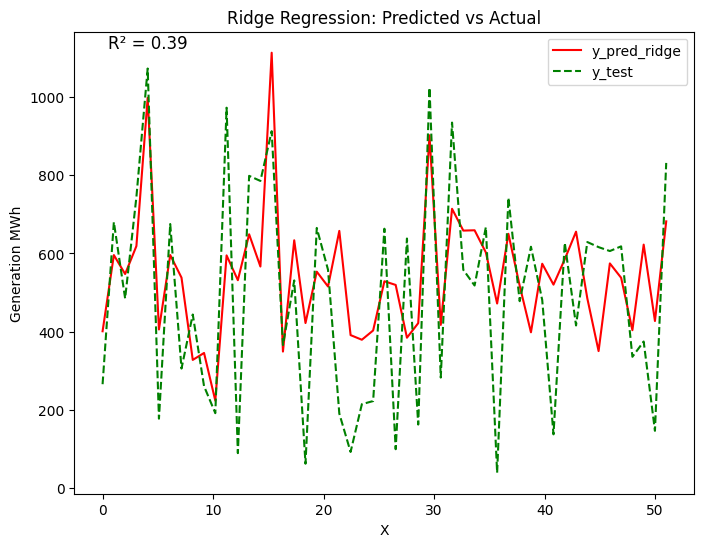

In [ ]:
from sklearn.linear_model import Ridge

# Fit the Ridge model
ridge = Ridge(alpha=0.3)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Predict y values using the test set
y_pred_ridge = ridge.predict(x_test)

# Generate a linspace with the same length as y_test and y_pred_ridge
linspace = np.linspace(0, len(y_test), len(y_test))

# Calculate R² score
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plot y_pred_ridge vs linspace and y_test vs linspace
plt.figure(figsize=(8, 6))

# Plot predicted values (ridge) vs linspace
plt.plot(linspace, y_pred_ridge, label="y_pred_ridge", color="red")

# Plot actual values vs linspace
plt.plot(linspace, y_test, label="y_test", color="green", linestyle="--")

# Add R² score to the plot
plt.text(0.5, max(y_pred_ridge), f'R² = {r2_ridge:.2f}', fontsize=12, verticalalignment="bottom")

# Labels and title
plt.title("Ridge Regression: Predicted vs Actual")
plt.xlabel("X")
plt.ylabel("Generation MWh")
plt.legend()

# Show the plot
plt.show()


Lasso Regression

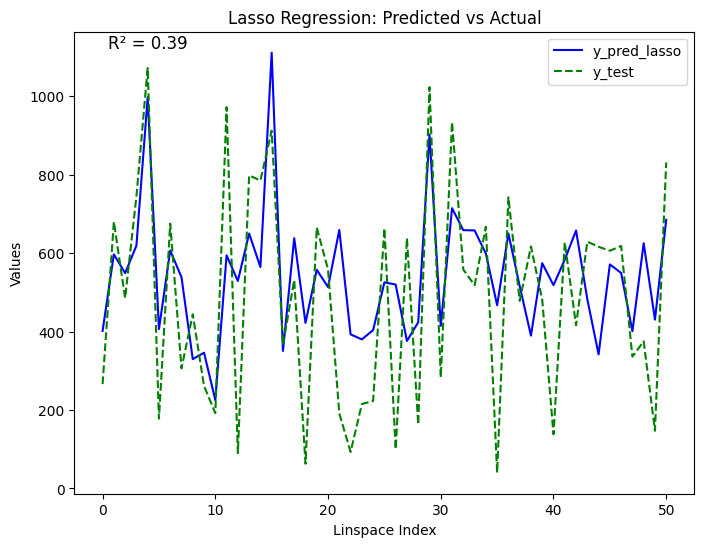

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

lasso = Lasso(alpha=0.1) 
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

linspace = np.linspace(0, len(y_test)-1, len(y_test))

r2 = r2_score(y_test, y_pred_lasso)

plt.figure(figsize=(8, 6))

plt.plot(linspace, y_pred_lasso, label="y_pred_lasso", color="blue")

plt.plot(linspace, y_test, label="y_test", color="green", linestyle="--")

plt.text(0.5, max(y_pred_lasso), f'R² = {r2:.2f}', fontsize=12, verticalalignment="bottom")

plt.title("Lasso Regression: Predicted vs Actual")
plt.xlabel("Linspace Index")
plt.ylabel("Values")
plt.legend()

plt.show()


Decision Trees

/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/hom

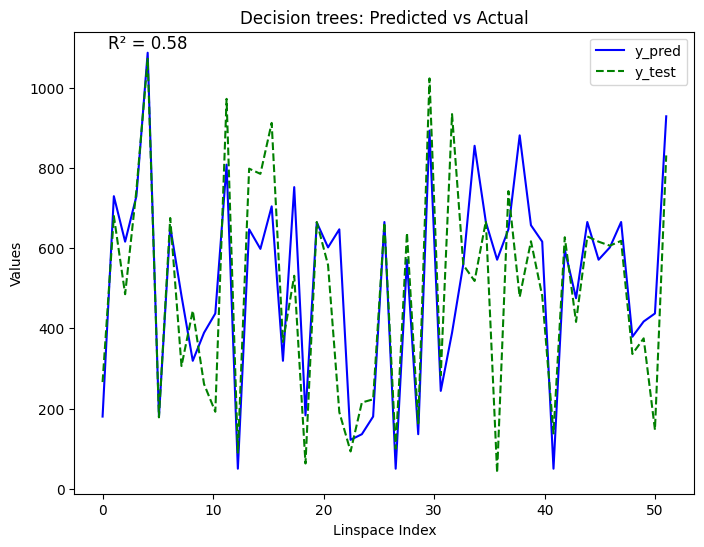

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Example data (replace these with actual data)
# x_train, x_test, y_train, y_test should be defined beforehand

# Define a range of hyperparameters to test
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],  # Depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Maximum features to consider for splitting
}

# Create a Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Train the Decision Tree Regressor with the best parameters
best_dtree = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dtree.predict(x_test)

# Evaluate the model performance on the test set
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))

plt.plot(linspace, y_pred, label="y_pred", color="blue")

plt.plot(linspace, y_test, label="y_test", color="green", linestyle="--")

plt.text(0.5, max(y_pred), f'R² = {r2:.2f}', fontsize=12, verticalalignment="bottom")

plt.title("Decision trees: Predicted vs Actual")
plt.xlabel("Linspace Index")
plt.ylabel("Values")
plt.legend()

plt.show()



XGBoost

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best Score (Negative MSE) for XGBoost: -9688.73559289331
Test Set MSE (XGBoost): 14204.10314555637
Test Set RMSE (XGBoost): 119.1809680509282
R² Score (XGBoost): 0.8102281093597412


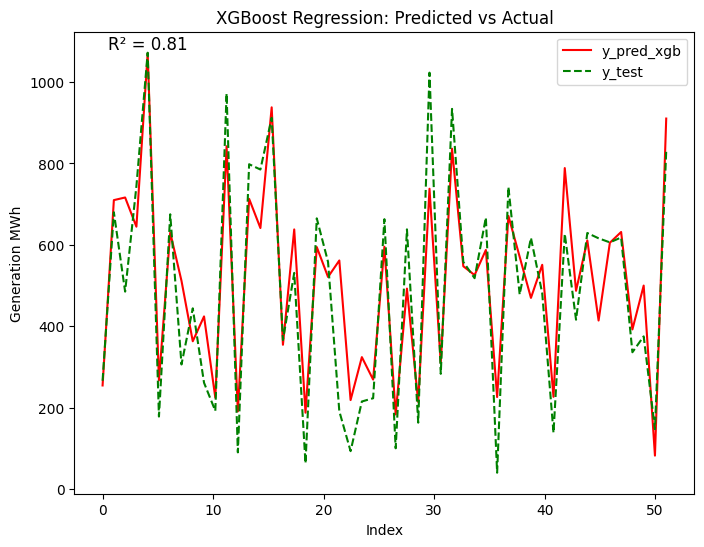

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of boosting rounds
    'max_depth': [3, 5, 7],                # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate (eta)
    'subsample': [0.8, 1.0],               # Subsampling ratio of training samples
    'colsample_bytree': [0.8, 1.0],        # Subsampling ratio of columns for each tree
}

xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_xgb.fit(x_train, y_train)

# Retrieve best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Best Score (Negative MSE) for XGBoost: {best_score_xgb}")

# Train the XGBoost Regressor with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Predict y values using the test set
y_pred_xgb = best_xgb_model.predict(x_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

linspace = np.linspace(0, len(y_test), len(y_test))

plt.figure(figsize=(8, 6))

plt.plot(linspace, y_pred_xgb, label="y_pred_xgb", color="red")

plt.plot(linspace, y_test, label="y_test", color="green", linestyle="--")

plt.text(0.5, max(y_pred_xgb), f'R² = {r2_xgb:.2f}', fontsize=12, verticalalignment="bottom")

plt.title("XGBoost Regression: Predicted vs Actual")
plt.xlabel("Index")
plt.ylabel("Generation MWh")
plt.legend()

plt.show()


Artificial Neural Networks

2024-11-12 14:44:16.729859: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 14:44:16.735249: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-12 14:44:16.748994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731422656.771534   15407 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731422656.779185   15407 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 14:44:16.802959: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Best Parameters for ANN: {'batch_size': 10, 'epochs': 100, 'learning_rate': 0.1, 'neurons': 30}
Best Score (Negative MSE) for ANN: -23477.733674081304


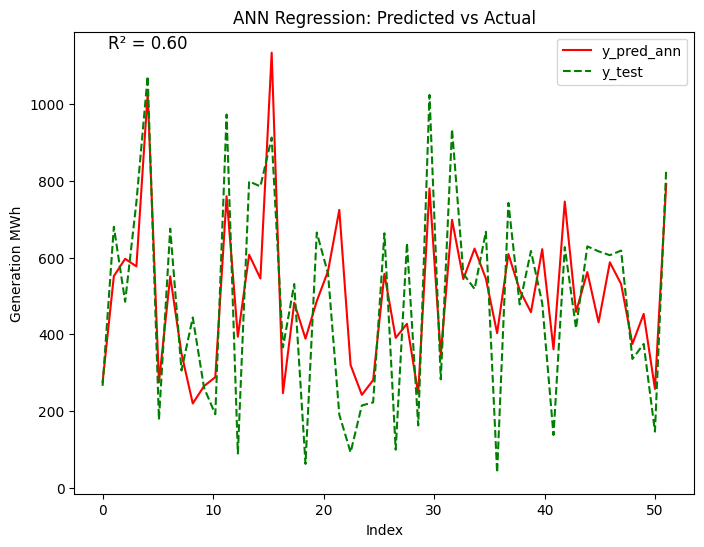

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam

# Define a function to create a Keras model (needed for KerasRegressor)
def create_model(learning_rate=0.01, neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# Wrap the model using KerasRegressor for scikit-learn compatibility
keras_reg = KerasRegressor(learning_rate=0.001,build_fn=create_model, neurons=10,verbose=0)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],   # Learning rates to try
    'neurons': [10, 20, 30],               # Number of neurons in each layer
    'epochs': [50, 100],                   # Number of epochs
    'batch_size': [10, 20],                # Batch sizes
}

# Set up GridSearchCV with cross-validation
grid_search_ann = GridSearchCV(estimator=keras_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_ann.fit(x_train, y_train)

# Retrieve the best parameters and best score
best_params_ann = grid_search_ann.best_params_
best_score_ann = grid_search_ann.best_score_

print(f"Best Parameters for ANN: {best_params_ann}")
print(f"Best Score (Negative MSE) for ANN: {best_score_ann}")

# Train the ANN model with the best parameters
best_ann_model = grid_search_ann.best_estimator_

# Predict y values using the test set
y_pred_ann = best_ann_model.predict(x_test)

# Calculate R² and RMSE scores
r2_ann = r2_score(y_test, y_pred_ann)

# Generate a linspace for plotting
linspace = np.linspace(0, len(y_test), len(y_test))

# Plot y_pred_ann vs linspace and y_test vs linspace
plt.figure(figsize=(8, 6))

# Plot predicted values (ANN) vs linspace
plt.plot(linspace, y_pred_ann, label="y_pred_ann", color="red")

# Plot actual values vs linspace
plt.plot(linspace, y_test, label="y_test", color="green", linestyle="--")

# Add R² score to the plot
plt.text(0.5, max(y_pred_ann), f'R² = {r2_ann:.2f}', fontsize=12, verticalalignment="bottom")

# Labels and title
plt.title("ANN Regression: Predicted vs Actual")
plt.xlabel("Index")
plt.ylabel("Generation MWh")
plt.legend()

# Show the plot
plt.show()


XGBoost